In [57]:
# Install all the require library using given command.

%pip install pandas
%pip install numpy
%pip install matplotlib

# Import require installed library using the given command. 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
books_csv = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
books_df = pd.DataFrame(books_csv)
toRead_csv = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv')
toRead_df = pd.DataFrame(toRead_csv)
ratings_csv = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
ratings_df = pd.DataFrame(ratings_csv)

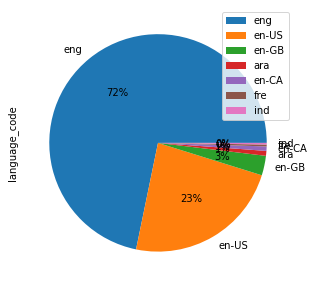

In [59]:
# Question 1
size = 10000
language = books_df["language_code"]
top_lang = books_df.language_code.value_counts().head(7)
top_lang.plot(kind="pie",legend="True",figsize=(5,5),autopct='%1.0f%%')
plt.show()

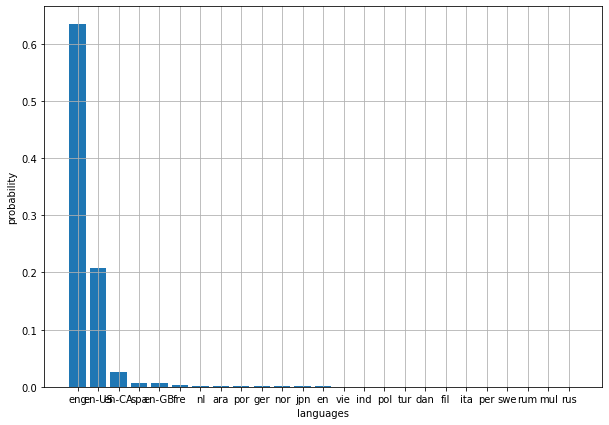

probability that a book chosen at random is english 0.008321770021219274
probability that a book chosen at random is french 2.384188064754548e-05


In [78]:
#Question 2
unique_lang = books_df.language_code.unique()     
lang = list(map(str,unique_lang))
lang.remove('nan')
fig = plt.figure(figsize =(10,7))
ser = books_df.language_code.value_counts()
plt.bar(lang,ser/10000)
plt.xlabel('languages')
plt.ylabel('probability')
plt.grid()
plt.show()
print('probability that a book chosen at random is english',(ser[0]+ser[1]+ser[2]+ser[4])/size)
print('probability that a book chosen at random is french',ser[5]/size)

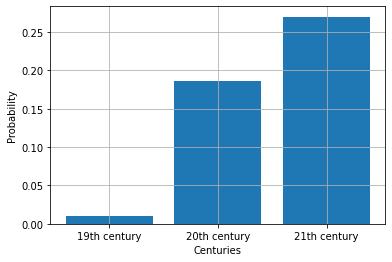

In [79]:
# Question 3
years = books_df["original_publication_year"]
avg_rate = books_df["average_rating"]
title = books_df["original_title"]
size = 10000
yr_1800 = {}
yr_1900 = {}
yr_2000 = {}

i = 0
while i < 10000:
  if 1800 < years[i] < 1900:
    yr_1800[title[i]] = years[i]
  elif 1900 < years[i] < 2000:
    yr_1900[title[i]] = years[i]
  elif 2000 < years[i] < 2100:
    yr_2000[title[i]] = years[i]
  i += 1

keys_1800 = list(yr_1800.keys())
keys_1900 = list(yr_1900.keys())
keys_2000 = list(yr_2000.keys())

gb_1800 = {}
gb_1900 = {}
gb_2000 = {}

i = 0
while i < size:
  if 4 < avg_rate[i] < 5:
    if title[i] in keys_1800:
      gb_1800[title[i]] = avg_rate[i]
    elif title[i] in keys_1900:
      gb_1900[title[i]] = avg_rate[i]
    elif title[i] in keys_2000:
      gb_2000[title[i]] = avg_rate[i]
  i += 1

prob = [len(gb_1800)/size,len(gb_1900)/size,len(gb_2000)/size]

plt.bar(["19th century","20th century","21th century"],prob)
plt.xlabel('Centuries')
plt.ylabel('Probability')
plt.grid()
plt.show()

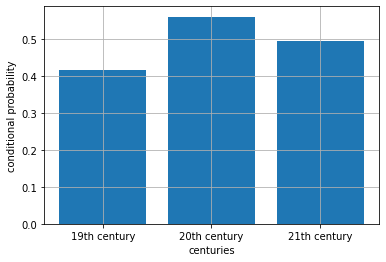

In [72]:
#question 4
cond_prob = [len(gb_1800)/len(yr_1800),len(gb_1900)/len(yr_1900),len(gb_2000)/len(yr_2000)]

plt.bar(["19th century","20th century","21th century"],cond_prob)
plt.xlabel('centuries')
plt.ylabel('conditional probability')
plt.grid()
plt.show()

In [63]:
#Question 5
rank_df = books_df.sort_values(by=['best_book_id'],ascending=True)
print(type(rank_df))
a = pd.DataFrame({"title":list(rank_df['original_title'][:5]),
             'best_book_id':list(rank_df['best_book_id'][:5])})
print(a)

rate_df = books_df.sort_values(by=['average_rating'],ascending=False)
b = pd.DataFrame({"title":list(rate_df['original_title'][:7]),
             'average_rating':list(rate_df['average_rating'][:7])})
b = b.drop(1)
b = b.drop(4)
b_copy = b.copy()
b_copy.rename(index={2:1,3:2,5:3,6:4}, inplace=True)
print(b_copy)

<class 'pandas.core.frame.DataFrame'>
                                       title  best_book_id
0     Harry Potter and the Half-Blood Prince             1
1  Harry Potter and the Order of the Phoenix             2
2   Harry Potter and the Philosopher's Stone             3
3   Harry Potter and the Prisoner of Azkaban             5
4        Harry Potter and the Goblet of Fire             6
                                               title  average_rating
0                     The Complete Calvin and Hobbes            4.82
1                                  Words of Radiance            4.77
2                           Mark of the Lion Trilogy            4.76
3  It's a Magical World: A Calvin and Hobbes Coll...            4.75
4  There's Treasure Everywhere: A Calvin and Hobb...            4.74


In [64]:
#Question 6
size = 912705

print('The top 5 books that are added to ‘To Read’ by the readers:')
ser = dict(toRead_df.book_id.value_counts())
top_5 = list(ser.keys())[:5]
for i in top_5:
  print(books_df["title"][i-1])

print('\nUser id of the readers who have the top 5 largest ‘To Read’ lists:')
ser = dict(toRead_df.user_id.value_counts())
top_5 = list(ser.keys())[:5]
for i in top_5:
  print(i)

The top 5 books that are added to ‘To Read’ by the readers:
The Book Thief
All the Light We Cannot See
Catch-22
1984
The Kite Runner

User id of the readers who have the top 5 largest ‘To Read’ lists:
38457
28259
38076
44530
46555


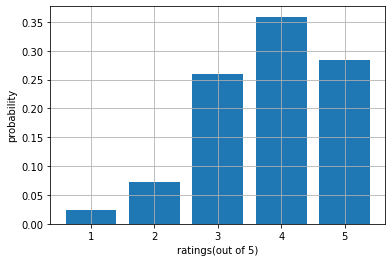

In [74]:
size = 1048575
rating = ratings_df['rating']
rate_1 = rate_2 = rate_3 = rate_4 = rate_5 = 0
for i in range(size):
  if rating[i] == 1:
    rate_1 += 1
  elif rating[i] == 2:
    rate_2 += 1
  elif rating[i] == 3:
    rate_3 += 1
  elif rating[i] == 4:
    rate_4 += 1
  elif rating[i] == 5:
    rate_5 += 1
ratings = [rate_1/size,rate_2/size,rate_3/size,rate_4/size,rate_5/size]
plt.bar(["1","2","3","4","5"],ratings)
plt.xlabel('ratings(out of 5)')
plt.ylabel('probability')
plt.grid()
plt.show()